# ASTR597 -- Homework 2
Kolby Weisenburger

3 March 2016

In [293]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from astropy.table import Table
import pandas as pd
import os 
import pyfits
%matplotlib inline

## Problem 1: The Field of Streams

Using the data from the SDSS catalog, and Python tools (e.g., matplotlib, numpy), make the analog of [Belokurov et al. 2006](http://iopscience.iop.org/1538-4357/642/2/L137/pdf/20450.web.pdf) "Field of streams" figure (Figure 1 in the paper):

<img src="streams.jpg" width="80%">

encompassing all DR12 data. Specifically:
* Write a query (either SQL or for LSD) to select stars satisfying the $g-r < 0.4$ color selection criterion (see Section 2 of Belokurov et al. 2006). You're free to either run this query against the [CasJobs SDSS database](http://skyserver.sdss.org/casjobs/), or the LSD copy of the database.
* Write Python code to divide the stars into the three r-band magnitude bins (see the paper and/or the figure caption for magnitude bin specification), and bin them into 0.5 deg x 0.5 deg pixels. You may find [numpy.histogram2d](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html) helpful.
* Use [matplotlib.imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) (or any other *Python* library of your choice) to create an RGB color composite equivalent of Figure 1. from the paper (see the figure caption for details)

##### SDSS CasJobs query:

SELECT type, ra, dec, g, r 

FROM Star 

WHERE ra < 230 AND ra > 110 AND dec > -5 AND dec < 60  AND g-r < 0.4 AND r < 22 AND g < 23

In [294]:
field = pyfits.getdata("hw2_streams.fit")

In [295]:
ra,dec,r = field["ra"], field["dec"], field["r"]

In [296]:
ra_bins = np.arange(np.min(ra),np.max(ra),0.5)
dec_bins = np.arange(np.min(dec),np.max(dec),0.5)
r_bins = [20.00, 20.66, 21.33, 22.00]

In [297]:
H, edges = np.histogramdd([ra,dec,rmag], bins=(ra_bins, dec_bins, r_bins))
H[H==0] = np.nan

# AHHHHHHH!!! square degree division had me stuck for years.
H /= .5**2

In [298]:
def rescale(val,new_min,new_max):
    val[val < new_min] = new_min
    val[val > new_max] = new_max
    return (val-new_min)/(new_max-new_min)

In [299]:
#  color code each of the rmag bins
red, green, blue = H[:,:,2], H[:,:,1], H[:,:,0]

In [300]:
# rescale everything to be [0,1] for RGB image

r0,r1 = 102, 330
g0,g1 = 107, 304
b0,b1 = 98, 267

H[:,:,2] = rescale(red, r0, r1)
H[:,:,1] = rescale(green, g0, g1)
H[:,:,0] = rescale(blue, b0, b1)

In [301]:
new = np.array([redtemp, greentemp, bluetemp])

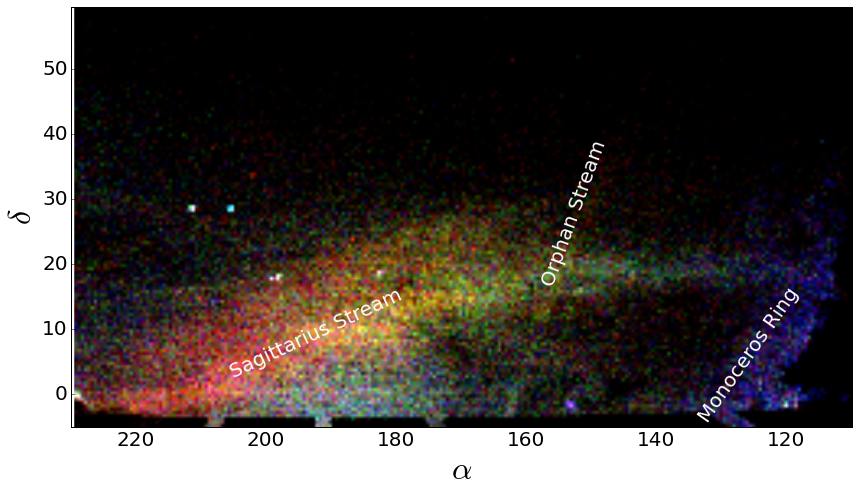

In [330]:
fig,ax = plt.subplots(figsize=(14,10))

plt.imshow(new.T,extent=[ra_bins[0], ra_bins[-1], dec_bins[0], dec_bins[-1]])

plt.tick_params(labelsize=20)
plt.xlabel(r'$\alpha$',fontsize=32)
plt.ylabel(r'$\delta$',fontsize=32)
plt.xlim(np.max(ra),np.min(ra))


ax.text(0.2, 0.3, 'Sagittarius Stream',color='white',
        transform=ax.transAxes,rotation=25, fontsize=20)
ax.text(0.6, 0.65, 'Orphan Stream',color='white',
        transform=ax.transAxes,rotation=70, fontsize=20)
ax.text(0.8, 0.3, 'Monoceros Ring',color='white',
        transform=ax.transAxes,rotation=55, fontsize=20)

plt.show()